In [279]:
from __future__ import print_function

import pylab as pl
import pandas as pd
from matplotlib import gridspec
import numpy as np
%pylab inline
from geopandas import GeoDataFrame

import urllib
import os
print("PUIdata", os.getenv("PUIDATA"))

import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib
PUIdata /nfshome/var287/PUIdata


### Energy Consumption data

In [6]:
!curl https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD > energycon.csv
!mv energycon.csv $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4329k    0 4329k    0     0  2112k      0 --:--:--  0:00:02 --:--:-- 2113k


### Pluto Manhattan

In [4]:
!mkdir MN_Pluto
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_18v1.zip
!unzip mn_mappluto_18v1.zip -d MN_Pluto
!mv mn_mappluto_18v1.zip $PUIDATA
!mv MN_Pluto $PUIDATA

--2018-11-28 18:07:56--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_18v1.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 104.64.76.252, 2600:1408:10:180::1500, 2600:1408:10:186::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|104.64.76.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11582182 (11M) [application/zip]
Saving to: ‘mn_mappluto_18v1.zip’

mn_mappluto_18v1.zi 100%[===================>]  11.04M  --.-KB/s    in 0.1s    

2018-11-28 18:07:56 (110 MB/s) - ‘mn_mappluto_18v1.zip’ saved [11582182/11582182]

Archive:  mn_mappluto_18v1.zip
  inflating: MN_Pluto/PLUTODD18v1.pdf  
  inflating: MN_Pluto/MN_Dcp_Mappinglot.dbf  
  inflating: MN_Pluto/MN_Dcp_Mappinglot.prj  
  inflating: MN_Pluto/MN_Dcp_Mappinglot.sbn  
  inflating: MN_Pluto/MN_Dcp_Mappinglot.sbx  
  inflating: MN_Pluto/MN_Dcp_Mappinglot.shp  
  inflating: MN_Pluto/MN_Dcp_Mappinglot.shp.xml  
  inflating: MN_Pluto/MN_Dcp_Mappinglot.shx  
  inflating: MN_Pluto/

...download...

In [28]:
# load the buildinmg size as a geoDF and the local law 84 as a dtaframe
nrg = pd.read_csv(os.getenv("PUIDATA") + 
                  "/energycon.csv")

bsize = GeoDataFrame.from_file(os.getenv("PUIDATA") + "/MN_Pluto/MNMapPLUTO.shp")

In [10]:
nrg.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_area,SHAPE_len,geometry
0,MN,1545,52,108,138,4000,02,5,10028,E022,...,0.000000e+00,None,1,None,None,18V1,0,2867.154705,260.428942,"POLYGON ((997277.2344360352 221816.0936279297,..."
1,MN,723,7501,104,93,6000,02,3,10001,E003,...,1.007230e+09,11/30/2006,1,None,None,18V1,7,10907.639931,417.764545,"POLYGON ((984164.5626220703 211846.0704345703,..."
2,MN,1680,48,111,170,5000,04,8,10029,E091,...,0.000000e+00,None,1,1,1,18V1,0,2665.033424,256.893308,"POLYGON ((1000742.195800781 227910.6640014648,..."
3,MN,1385,32,108,130,2003,02,4,10021,E039,...,0.000000e+00,None,1,None,None,18V1,0,15302.920914,505.033271,"POLYGON ((994007.6885986328 219880.4284057617,..."
4,MN,1197,27,107,169,5000,03,6,10024,E074,...,0.000000e+00,None,1,None,None,18V1,0,4374.612456,295.652483,"POLYGON ((992273.6849975586 224863.4904174805,..."


## exploring the data a bit

As we discussed, coming up with a sensible model generally requires domain expertise. However, if the data you are investigating shows "obvious patterns", for example if two of the variable look like a line when plotted one against the other, then those patterns (correlations) may help you finding reasonable models for the data.

Explore your data, starting with a scatter matrix. 
A scatter matrix is a plot of all variables in your data against all other variables: 
each pair of variables is a subplot in the plot matrix. The diagonal line then would be a plot of a variable against itself, which is useless, so it is usually substituted by a histogram of that variable (or sometimes a KDE, which is basically a smooth histogram).

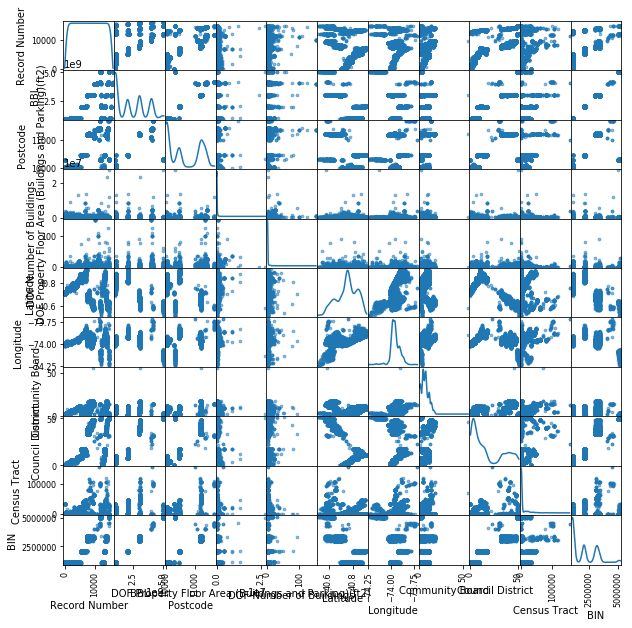

In [12]:
sfig = pd.scatter_matrix(nrg, s=30, figsize=(10, 10), diagonal='kde')

Figure 1: Scatter matrix plot which shows distribution of columns with numeric data type in energy data and correlation between the variables

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: I need to remove all values that cannot convert to float in order to use the columns and convert them to float arrays and do math with them.

You can use pd.to_numeric() which is a function that transforms values to float (when possible). The default behavior of this function is to throw an error if it encounters a value that it cannot convert. That behavior can be modified with the "error" keyword, by setting it to "coerce". Please look at the function documentation to understand the syntax.

## data cleaning and aggregation 
### checking the content of the datasets


clean up columns I am not using: for my solution, I will keep  BBL, 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)' from the energy dataframe, and BBL , UnitsTotal, UnitsRes, 'YearBuilt', and 'geometry' from the PLUTO geodaraframe

### remove what you do not need

In [13]:
nrg.columns.sort_values()

Index(['Automatic Water Benchmarking Eligible', 'BBL', 'BBLs Co-reported',
       'BIN', 'Borough', 'Census Tract', 'Co-reported BBL Status',
       'Community Board', 'Council District',
       'DOF Benchmarking Submission Status', 'DOF Number of Buildings',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Direct GHG Emissions(MtCO2e)', 'ENERGY STAR Score',
       'Indirect GHG Emissions(MtCO2e)', 'Latitude', 'Longitude',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'NTA', 'Postcode', 'Primary Property Type - Self Selected',
       'Record Number', 'Reported NYC Building Identificaiton Numbers (BINs)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'Reported Water Method', 'Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Street Name', 'Street Number', 'Total GHG Emissions(MtCO2e)',
       'Weather Normalized Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)'],
      dtype='object')

In [29]:
bsize.columns.sort_values()

Index(['APPBBL', 'APPDate', 'Address', 'AreaSource', 'AssessLand', 'AssessTot',
       'BBL', 'BldgArea', 'BldgClass', 'BldgDepth', 'BldgFront', 'Block',
       'BoroCode', 'Borough', 'BsmtCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010',
       'ComArea', 'CommFAR', 'CondoNo', 'Council', 'EDesigNum', 'Easements',
       'ExemptLand', 'ExemptTot', 'Ext', 'FIRM07_FLA', 'FacilFAR',
       'FactryArea', 'FireComp', 'GarageArea', 'HealthArea', 'HealthCent',
       'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot', 'LotArea',
       'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PFIRM15_FL', 'PLUTOMapID',
       'PolicePrct', 'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea',
       'SHAPE_area', 'SHAPE_len', 'SPDist1', 'SPDist2', 'SPDist3', 'Sanborn',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'SchoolDist', 'SplitZone',
       'StrgeArea', 'TaxMap', 'Tract201

In [30]:
#leave
nrg = nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)' ]]
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000


In [33]:
#leave
bsize = bsize[['UnitsRes', 'UnitsTotal', 'YearBuilt', 'BBL', 'geometry']]
bsize.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,geometry
0,16,18,1920,1.015450e+09,"POLYGON ((997277.2344360352 221816.0936279297,..."
1,50,50,1914,1.007238e+09,"POLYGON ((984164.5626220703 211846.0704345703,..."
2,10,10,1910,1.016800e+09,"POLYGON ((1000742.195800781 227910.6640014648,..."
3,29,32,1928,1.013850e+09,"POLYGON ((994007.6885986328 219880.4284057617,..."
4,26,26,1900,1.011970e+09,"POLYGON ((992273.6849975586 224863.4904174805,..."


Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/GEOP/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


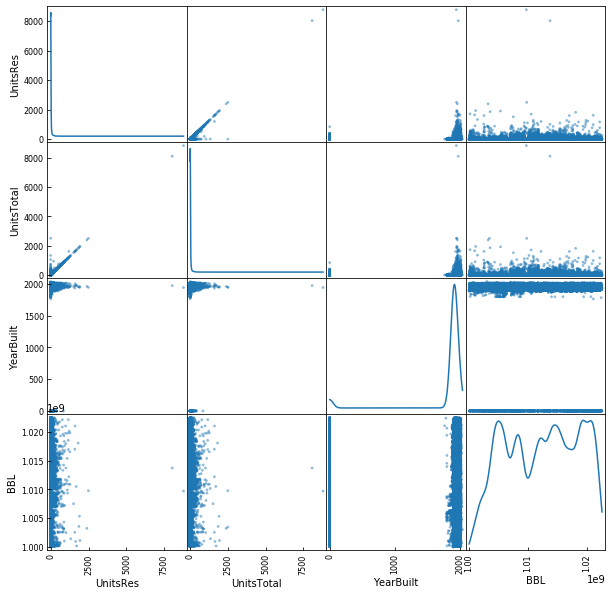

In [11]:
#leave (dont try this scatter matrix before cleaning the data, it will take a while)
sfig = pd.scatter_matrix(bsize, s=30, figsize=(10, 10), diagonal='kde')

Figure 2: Scatter matrix plot of numeric columns in Manhattan Pluto Data.

## converting  the relevant columns to numeric values and throwing away spurious entries

use pd.to_numeric() to convert strings to numeric values, remember the keyword "errors" which will be useful


In [34]:
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')

In [35]:
bsize['BBL'] = pd.to_numeric(bsize['BBL'], errors='coerce')

In [59]:
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(
    nrg['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')

In [60]:
##check that your conversion worked: e.g.
nrg['Site EUI(kBtu/ft2)'].astype(float)[:10], bsize.BBL.astype(float)[:10]
#[...] do this for all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want

#this should not return an error
#notice I can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


(0   NaN
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 6   NaN
 7   NaN
 8   NaN
 9   NaN
 Name: Site EUI(kBtu/ft2), dtype: float64, 0    1.015450e+09
 1    1.007238e+09
 2    1.016800e+09
 3    1.013850e+09
 4    1.011970e+09
 5    1.002360e+09
 6    1.008370e+09
 7    1.001960e+09
 8    1.022240e+09
 9    1.011270e+09
 Name: BBL, dtype: float64)

In [37]:
##check that your conversion worked: e.g.
print ("number of missing energy observations:", np.isnan(nrg['Site EUI(kBtu/ft2)'].astype(float)).sum())

number of missing energy observations: 4623


In [38]:
##check that your conversion worked: e.g.
print ("fraction of missing energy observations: %.2f"%(np.isnan(nrg['Site EUI(kBtu/ft2)'].astype(float)).sum() /
      len(nrg['Site EUI(kBtu/ft2)'])))

fraction of missing energy observations: 0.29


In [80]:
nrg = nrg.dropna()

 ## merge the 2 datasets
 I can merge the dataframes on NYC Borough, Block, and Lot: BBL

In [62]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919.0
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200.0
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000.0


In [81]:
#leave
#merge in a geodataframe for mapping, and if you want in a regular DF for analysis (more portable)
bblnrgdataGPD =  pd.merge(bsize, nrg, left_on='BBL', right_on='BBL')
bblnrgdata = bblnrgdataGPD[['UnitsRes', 'UnitsTotal', 'YearBuilt', 'BBL',
                         'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)' ]]

In [82]:
bblnrgdata.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,50,50,1914,1.007238e+09,68.7,95844.0
1,29,32,1928,1.013850e+09,87.4,206989.0
2,72,72,1923,1.021740e+09,140.4,52920.0
3,107,108,1931,1.008830e+09,96.5,98359.0
4,134,138,1910,1.008570e+09,36.4,154000.0


In [55]:
type(bblnrgdata)

pandas.core.frame.DataFrame

# Plot the data as a choropleth for the 2 quantities of interest: number of units and energy consumed energy

In [83]:
bblnrgdataGPD['logarea'] = np.log10(bblnrgdataGPD['Reported Property Floor Area (Building(s)) (ft²)'])
bblnrgdataGPD['lognrg'] = np.log(bblnrgdataGPD['Site EUI(kBtu/ft2)'])

(977413.35317382822, 1011284.188208008, 191684.49734802247, 261826.39004211425)

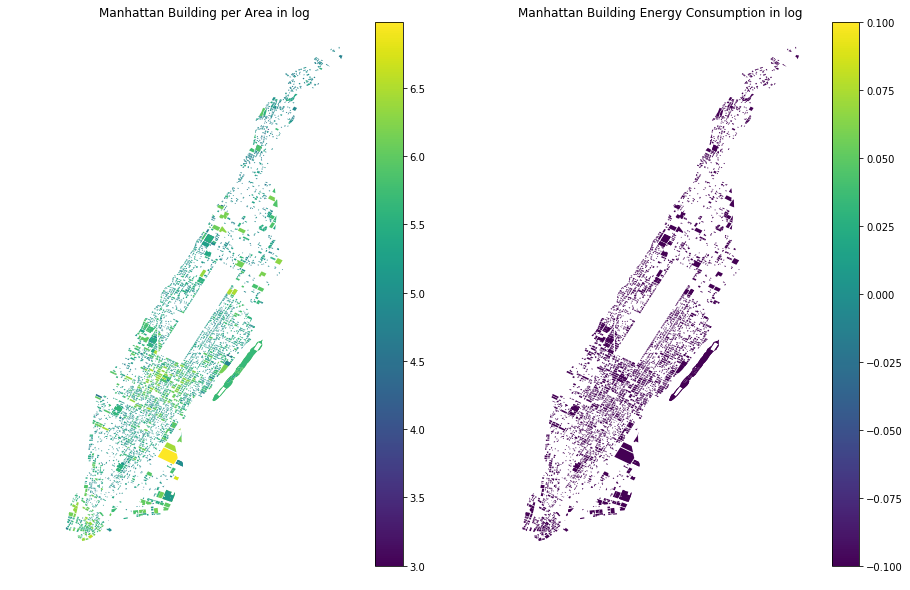

In [305]:
f = pl.figure(figsize = (15, 10))
ax = f.add_subplot(121)
bblnrgdataGPD.plot(column = 'logarea',ax = ax, cmap = 'viridis', legend = True )


ax2 = f.add_subplot(122)
bblnrgdataGPD.plot(column = 'lognrg', ax = ax2, cmap = 'viridis', legend = True)


ax.set_title("Manhattan Building per Area in log")
ax2.set_title("Manhattan Building Energy Consumption in log")

ax.axis('off')
ax2.axis('off')


Figure 3: Maps of Manhattan buildings by area and by energy consupmption in kbtu/ft2 with log10 values of each variable. The general distirbution of the buildin area seems to differ while distribution of energy consumption seems to be homogenous.

# feature engineering
the question was not if larger buildings consume more energy, its if occupancy increases consumption, so we want to model *total energy* with *total units*.
Create a total energy column from the columns you have.
Plot a column vs the other. You will be unable to see most of the points (as in the plot below). Make another plot "zooming in" to remove some outliers from the view and see if this reveals some patterns.

In [113]:
## multiplying area by energy/area to get total energy per building
bblnrgdata['nrg'] = bblnrgdata[\
    'Reported Property Floor Area (Building(s)) (ft²)'].astype(float) *\
                bblnrgdata['Site EUI(kBtu/ft2)'].astype(float)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Text(0.5,0,'Energy Consumption per Building (kBtu)')

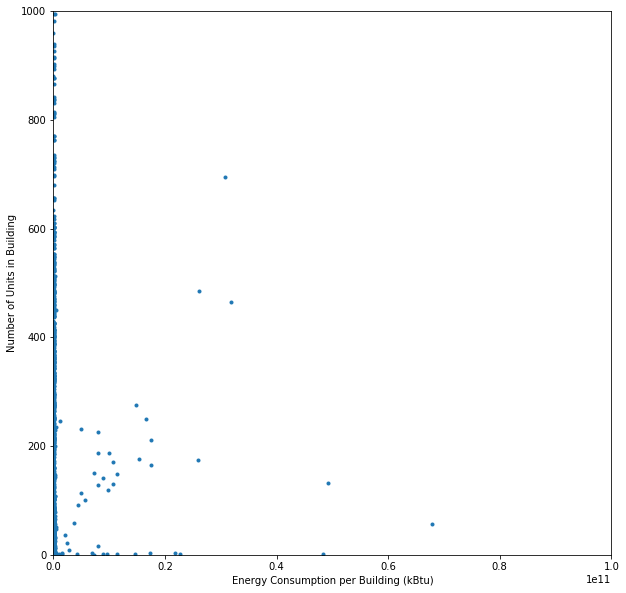

In [149]:
pl.figure(figsize=(10,10)) 
pl.plot(bblnrgdata['nrg'], bblnrgdata['UnitsTotal'], '.')
pl.xlim(0,1e11)
pl.ylim(0,1000)
pl.ylabel('Number of Units in Building')
pl.xlabel('Energy Consumption per Building (kBtu)')



Figure 4: Plot of Energy consumption vs Number of units in the buildings. There is a general positive trend although the a large numbers of data points are near 0 in terms of the energy consumption.

# The magic of log scales!
**Please read the following vcarefully! this is the only opportunity I have to discuss this with you this year. **

Very often in science we will visualize data in log scale and model log data instead of the natural dataset (generally in log10).

In in log10 every order of magnitude is separate by a unit: log10(10) = 1, log10(100) = 2, log10(100000)=5 (basically log10 gives you the number of 0's in its argument, or the *order of magnitude*)





Text(0,0.5,'$log_{10}$(x)')

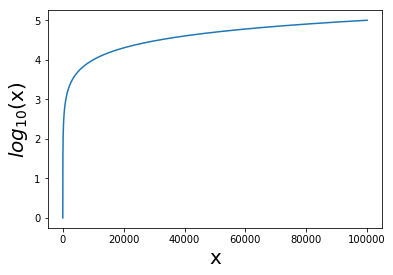

In [150]:
pl.plot(np.arange(100000), np.log10(np.arange(100000)), '-')
pl.xlabel("x", fontsize=20)
pl.ylabel(r"$log_{10}$(x)", fontsize=20)

Figure 6: Log 10 function plot in order of magnitude.

# Plot both NRG vs Units total and Units total vs NRG, both in log space

Surely there is a right way to think about which one is the independent and the dependent variable in this problem: do we think energy consumption causes occupancy or occupancy causes consumption?

You are going to have to limit the axis values or you will not see anything: 

    energy between (1000,1e10)

    units between (1,1000)

You can cut the axis to visualize the data like this, **but you will need to cut the data to remove datapoint outside of this range when you model to get a good model.**

to visualize the data in log scale you can use the dataframe plotting method with the argument 

    loglog=True


The logarithm is a monotonic function : wherever its argument grows the function grows, wherever its argument decrease its log decrease. It's a function that grows fast when the argument is small and slowly when the argument is large, so it compresses the scale. 

Another property of the logarithm is that if the relationship between data is a power law (y = x^a) then the relationship between the log of the variables is linear! And we know that modeling things with linear models is easy!

	log_10(x^y) = y ∙ log_10(x)
    
And since power laws are very common in nature we often model with power laws, or with inear relationships in log space.

Text(0,0.5,'Energy Consumption per Building (kBtu)')

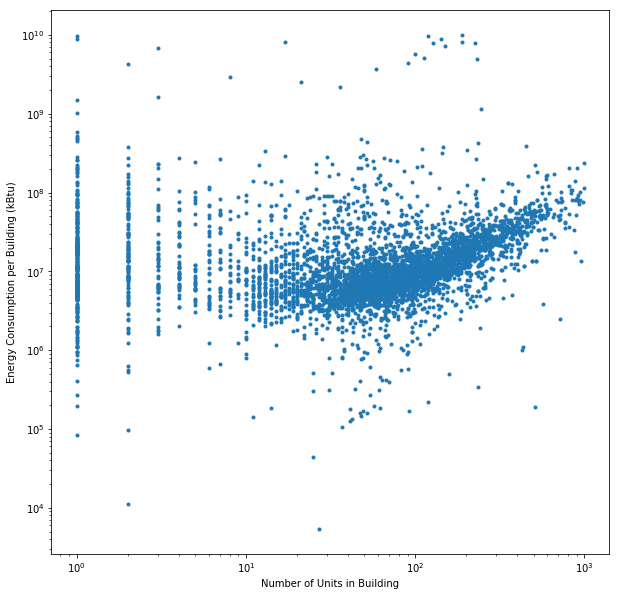

In [178]:
pl.figure(figsize=(10,10)) 
pl.loglog(bblnrgdataCut['UnitsTotal'], bblnrgdataCut['nrg'], '.')

pl.xlabel('Number of Units in Building')
pl.ylabel('Energy Consumption per Building (kBtu)')

Figure 6: Plot of log10 transformed values for Energy consumption vs number of units. There is a positive general trend in the distribution.

Text(0.5,0,'Energy Consumption per Building (kBtu)')

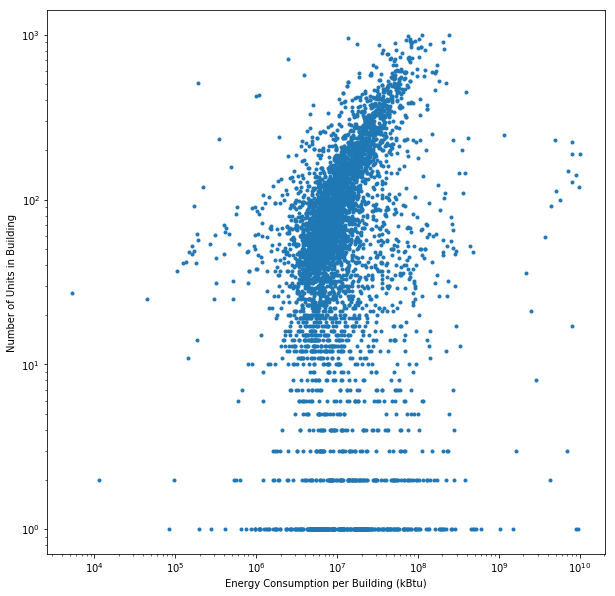

In [179]:
pl.figure(figsize=(10,10)) 
pl.loglog(bblnrgdataCut['nrg'], bblnrgdataCut['UnitsTotal'], '.')

pl.ylabel('Number of Units in Building')
pl.xlabel('Energy Consumption per Building (kBtu)')

Figure 7: Plot of log 10 transformed of Units vs Energy Consumption.

In [184]:
1e10

10000000000.0

In [236]:
bblnrgdataCut = bblnrgdata.loc[bblnrgdata['UnitsTotal'] < 1000]

bblnrgdataCut = bblnrgdataCut.loc[bblnrgdataCut['UnitsTotal'] > 1]
bblnrgdataCut = bblnrgdataCut.loc[bblnrgdataCut['nrg'] > 1000]
bblnrgdataCut = bblnrgdataCut.loc[bblnrgdataCut['nrg'] < 1e10]


bblnrgdataCut['logNrg']  = np.log10(bblnrgdataCut['nrg'])
bblnrgdataCut['logUnits']  = np.log10(bblnrgdataCut['UnitsTotal'])

bblnrgdataCut.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),nrg,logNrg,logUnits
0,50,50,1914,1.007238e+09,68.7,95844.0,6584482.8,6.818522,1.698970
1,29,32,1928,1.013850e+09,87.4,206989.0,18090838.6,7.257459,1.505150
2,72,72,1923,1.021740e+09,140.4,52920.0,7429968.0,6.870987,1.857332
3,107,108,1931,1.008830e+09,96.5,98359.0,9491643.5,6.977341,2.033424
4,134,138,1910,1.008570e+09,36.4,154000.0,5605600.0,6.748622,2.139879


# Fit the data with a line in log space:  

**make sure you print the summary and plot the data and the model**

## Model NRG as a linear function of number of units in the building 
Ciertainly there is a right way to think about this: which is the *independent* and the *dependent* variable? which do we think causes which? do units "cause"energy consumption or vice versa? please answer below

**answer: UNITS CAUSE ENERGY CONSUMPTION - Units is Independent while Energy Consumption is Dependent**

However, indulge me and try both models: models (nrg vs units total & units total vs nrg). 

- create the models with statsmodels
- print the model summary
- plot the data and the fit
- Check and comment on how the following model diagnostics change: 
        R^2 and LogLikelihood
        
(remember to use only the data in the appropriate range, see the previous step)

In [237]:
nrg_unit_OLS = smf.ols(formula='logNrg ~ logUnits', data=bblnrgdataCut).fit()
nrg_unit_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logNrg   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           5.57e-58
Time:                        22:04:47   Log-Likelihood:                -2854.5
No. Observations:                4624   AIC:                             5713.
Df Residuals:                    4622   BIC:                             5726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.6627      0.024    280.699      0.000         6.616     6.709
logUnits       0.2078      0.013     16.279      0.000         0.183     0.233
==============================================================================
Omnibus:                     1304.227   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12405.006
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                      10.734   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Energy Consumption per Building (kBtu)')

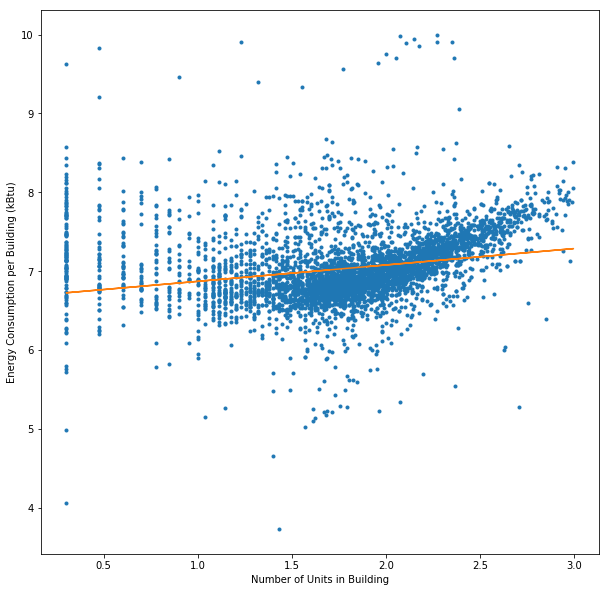

In [238]:
pl.figure(figsize=(10,10))

pl.plot(bblnrgdataCut['logUnits'], bblnrgdataCut['logNrg'] , '.')
pl.plot(bblnrgdataCut['logUnits'], nrg_unit_OLS.predict(bblnrgdataCut))

pl.xlabel('Number of Units in Building')
pl.ylabel('Energy Consumption per Building (kBtu)')

Figure 8: Fitted linear regression model of Energy consumption vs Unit which shows a positive trend.

In [239]:
unit_nrg_OLS = smf.ols(formula='logUnits ~ logNrg', data=bblnrgdataCut).fit()
unit_nrg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logUnits   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           5.57e-58
Time:                        22:04:59   Log-Likelihood:                -3380.8
No. Observations:                4624   AIC:                             6766.
Df Residuals:                    4622   BIC:                             6778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0493      0.113     -0.437      0.662        -0.271     0.172
logNrg         0.2609      0.016     16.279      0.000         0.230     0.292
==============================================================================
Omnibus:                      808.458   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1423.999
Skew:                          -1.119   Prob(JB):                    6.06e-310
Kurtosis:                       4.544   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,'Energy Consumption per Building (kBtu)')

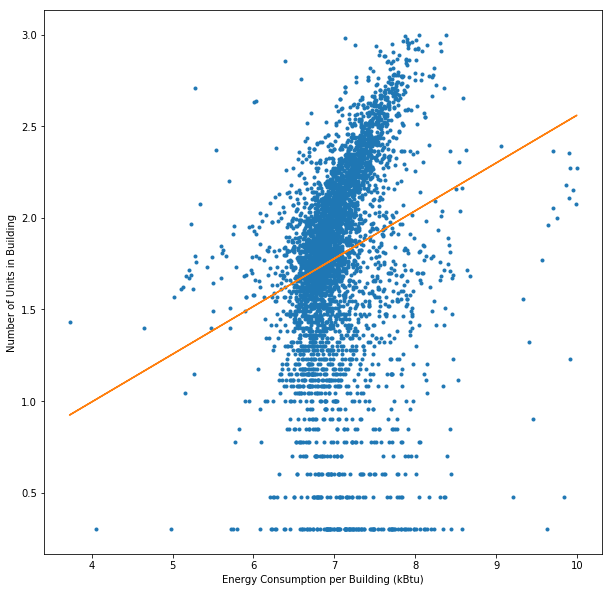

In [240]:
pl.figure(figsize=(10,10))

pl.plot(bblnrgdataCut['logNrg'], bblnrgdataCut['logUnits'] , '.')
pl.plot(bblnrgdataCut['logNrg'], unit_nrg_OLS.predict(bblnrgdataCut))

pl.ylabel('Number of Units in Building')
pl.xlabel('Energy Consumption per Building (kBtu)')

Figure 9: Fitted linear regression model of Unit vs Energy consumption which shows a positive trend but does not fit well the data points.

# Second degree polynomial fit

model the data with a slightly more complex model: 
    
    y = ax*x + bx + c, 

instead of 
        
    y = bx + c
    
**make sure you print the summary and plot the data and the model**


In [241]:
bblnrgdataCut.sort_values(by='logUnits', axis = 0, inplace = True)

In [242]:
bblnrgdataCut['logUnits2']  = bblnrgdataCut['logUnits']**2

nrg_unit_OLS_poly = smf.ols(formula='logNrg ~ logUnits + logUnits2', data=bblnrgdataCut).fit()
nrg_unit_OLS_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logNrg   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     574.1
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          2.06e-223
Time:                        22:05:05   Log-Likelihood:                -2470.3
No. Observations:                4624   AIC:                             4947.
Df Residuals:                    4621   BIC:                             4966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.6469      0.040    189.005      0.000         7.568     7.726
logUnits      -1.1852      0.050    -23.891      0.000        -1.283    -1.088
logUnits2      0.4350      0.015     28.903      0.000         0.405     0.464
==============================================================================
Omnibus:                     1436.558   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24336.372
Skew:                           1.032   Prob(JB):                         0.00
Kurtosis:                      14.048   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Energy Consumption per Building (kBtu)')

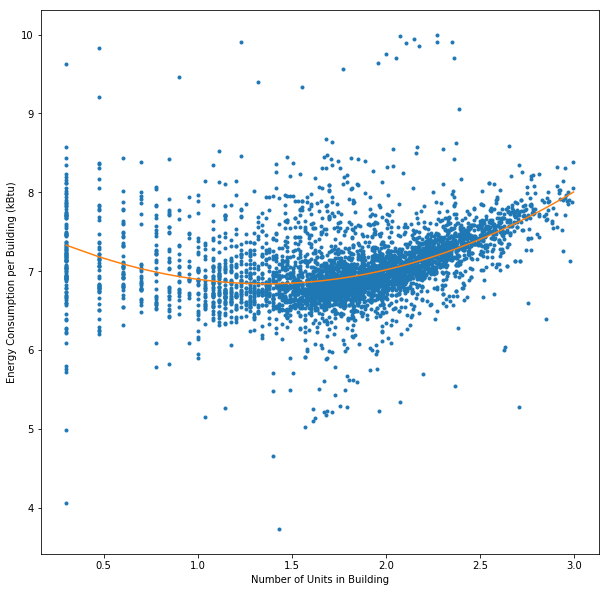

In [243]:
pl.figure(figsize=(10,10))

pl.plot(bblnrgdataCut['logUnits'], bblnrgdataCut['logNrg'] , '.')
pl.plot(bblnrgdataCut['logUnits'], nrg_unit_OLS_poly.predict(bblnrgdataCut))

pl.xlabel('Number of Units in Building')
pl.ylabel('Energy Consumption per Building (kBtu)')

Figure 10: Fitted polynomial linear regression model of Energy consumption vs Units which shows a better fit to the datapoints.

# calculate the chi square and likelihood of your model

## Define a chisquare function

In [244]:
#leave
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        c = sum( ((model - data)**2) / 1 )
    else:
        c = sum( ((model - data)**2) / (errors**2) )
    return c

## Define and calculate errors

Assume Poisson statistics and calculate the errors accordingly. Remember that you have used 2 quantities combined linearly to calculate the energy (your *dependent* variable) , so the errors combine in quadrature!

    Total Error = sqrt(error1^2 + error2^2)
    
Your *independent* variable has uncertainty also! assume it is also Poissonian

** propagation of errors on the log:**
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Linear_combinations

$f=a\log _{10}(A)$

$\sigma _{f}\approx \left(a{\frac {\sigma _{A}}{A\ln(10)}}\right)$

In [247]:
error1 = np.sqrt(bblnrgdataCut['Reported Property Floor Area (Building(s)) (ft²)'])
error2 = np.sqrt(bblnrgdataCut['Site EUI(kBtu/ft2)'])

totalerror = np.sqrt((error1**2) + (error2**2))

In [248]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value


#errors on the measured quantities
bblnrgdataCut['errorsnrg'] =  totalerror / (bblnrgdataCut['nrg'] * np.log(10))

# better WOULD BE to calculate each error and add in quadrature: sqrt(1/A + 1/B) which becomes
#errorsnrg = np.sqrt(1.0 / bblnrgdataCut['Reported Property Floor Area'] + 1.0 / bblnrgdataCut['Site EUI(kBtu/ft2)'])
#but this leads to insane error values (insanely small)

## Assume count statistics in the number of units as well
bblnrgdataCut['errorsunits'] = np.sqrt(bblnrgdataCut['UnitsTotal']) / (bblnrgdataCut['UnitsTotal'] * np.log(10))


## Make 3 plots: one with x errors, one with y errors, one with x and y errors. 

with pylab you can do it with pl.errorbar(x, y, xerr=xerror, yerr=yerror)

The largest error bar is for


,UnitsRes,UnitsTotal,YearBuilt,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),nrg,logNrg,logUnits,logUnits2,errorsnrg,errorsunits
2566,27,27,1909,1.019900e+09,0.1,53440.0,5344.0,3.727866,1.431364,2.048802,0.018787,0.08358


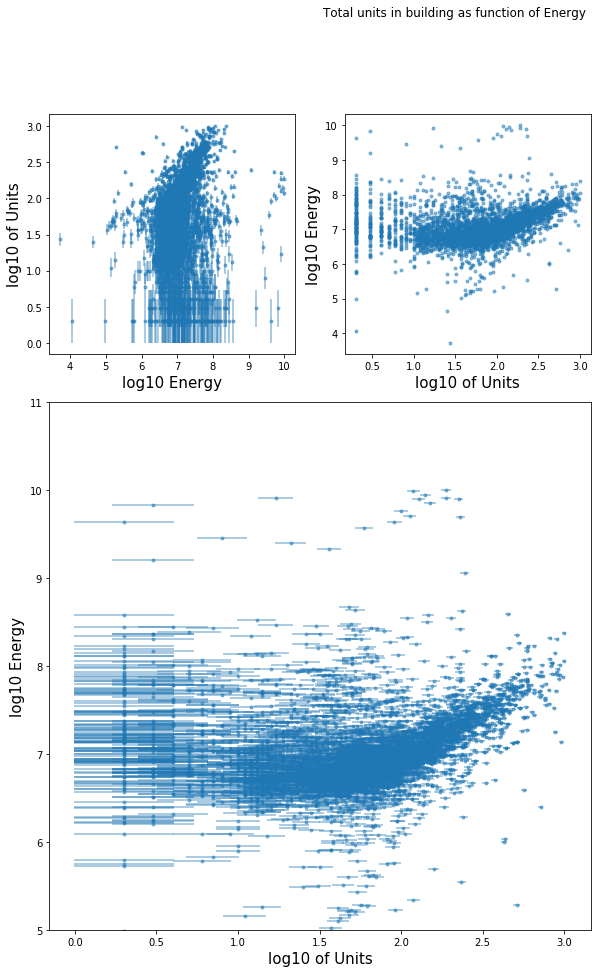

In [267]:
#I could also include errors for number of units
fig2 = plt.figure(figsize=(15,15))

gs1 = gridspec.GridSpec(3, 3, fig2)
gs1.update(left=0.68, right=0.68, wspace=0.2)


ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
ax1.errorbar(np.log10(bblnrgdataCut.nrg), np.log10(bblnrgdataCut.UnitsTotal), 
            yerr=bblnrgdataCut.errorsunits, fmt='.',
            alpha=0.5)
ax1.set_ylabel("log10 of Units", fontsize=15)
ax1.set_xlabel("log10 Energy", fontsize=15)
pl.suptitle("Total units in building as function of Energy")


ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2.errorbar(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.nrg), 
            yerr=bblnrgdataCut.errorsnrg, fmt='.',
            alpha=0.5)
ax2.set_xlabel("log10 of Units", fontsize=15)
ax2.set_ylabel("log10 Energy", fontsize=15)

ax4 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4.errorbar(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.nrg), 
            yerr=bblnrgdataCut.errorsnrg,
           xerr=bblnrgdataCut.errorsunits, alpha=0.5, fmt='.')
ax4.set_xlabel("log10 of Units", fontsize=15)
ax4.set_ylabel("log10 Energy", fontsize=15)
ax4.set_ylim(5,11)

print ("The largest error bar is for")
bblnrgdataCut[bblnrgdataCut.errorsnrg == bblnrgdataCut.errorsnrg.max()]


Figure 11: The same as Figure 5 and 6, but with errorbars. In the top panel the errors on the Units in the building are plotted, in the bottom panels the errors on the energy are plotted, but they are too small to see,  and both on the right side panel. The bottom right panel is a zoom-in of the bottom left panel. Errors are measured by assuming Poisson statistics at the measurement level for energy per square foot, squarefootage, and for the number of units, and propagate properly to the log space. Notice that we do not know what the units of energy really represent: the Poisson statitics should be applied to the measured counts, but the enrgy consumption is a continuous variable, only discretized by the act of measuring it. 

IMPORTANT! errors as the square root of the measurement (Poisson statistics) are ONLY meaningful when you are potting dimensionless quantoities! here it is preposterous to assume that the errors are the square root of the measurement. WHY? because then if I express my energy by sq meter, instead of sq feet, I get a different error on the measurement for the same measurement - which makes no sense! However, in this case, I am not using the errors to create the model (no WLS for example) so this error allows me to compare uncertainty on the datapoints. Even if the errors are different, under linear transformations (changes of units for example) the relationship between errors on 2 datapoints will be preserved. 

Notice: No points are taken off if other errors are used, including the sqrt of the log energy, and the correct errors propagation in the log on errors calculated, however, as the sqrt of the tot energy per building, but the errors are in the measured quantities, so this is the proper way to obtain them. In addition the units of energy are extremely large, thus the errors in percentage on the energy are extremely small. These errors are likely to be underestmated due to our ignorance of the details of the experiment.

## Add the errors and calculate the chi square


### calculate the degrees of freedom of this model

In [283]:
#degrees of freedom: number of observations - number of model parameters
# note: these are reported as dof of the residuals in the statsmodels fit summary, but jsut to make sure let's calculate them
dof = len(bblnrgdataCut) - len(nrg_unit_OLS.params)
print ("degrees of freedom:" , dof)

degrees of freedom: 4622


In [286]:
print ("Units vs Energy residuals (no errors include): %.2f"%\
       (chi2(np.log10(bblnrgdataCut.UnitsTotal), unit_nrg_OLS.predict()) / 
        float(dof)))

print ("Units vs Energy chi square per DOF w independent variable error only: %.2f"%\
       (chi2(np.log10(bblnrgdataCut.UnitsTotal), unit_nrg_OLS.predict(), 
            errors = bblnrgdataCut.errorsnrg) / dof))

print ("Units vs Energy chi square per DOF : %.2f"%\
       (chi2(np.log10(bblnrgdataCut.UnitsTotal), unit_nrg_OLS.predict(), 
            errors = np.sqrt(bblnrgdataCut.errorsnrg**2 + 
                             bblnrgdataCut.errorsunits**2))  / dof))


Units vs Energy residuals (no errors include): 0.28
Units vs Energy chi square per DOF w independent variable error only: 1882920108127.44
Units vs Energy chi square per DOF : 201.64


In [287]:
print ("Energy vs Units residuals (no errors include): %.2f"%\
       (chi2(np.log10(bblnrgdataCut.nrg), nrg_unit_OLS.predict()) / dof))

print ("Energy vs Units chi square per DOF w independent variable error only: %.2f"%\
       (chi2(np.log10(bblnrgdataCut.nrg), nrg_unit_OLS.predict(), 
            errors = bblnrgdataCut.errorsnrg) / dof))

print ("Energy vs Units chi square per DOF : %.2f"%\
       (chi2(np.log10(bblnrgdataCut.nrg), nrg_unit_OLS.predict(), 
            errors = np.sqrt(bblnrgdataCut.errorsnrg**2 + 
                             bblnrgdataCut.errorsunits**2))  / dof))


Energy vs Units residuals (no errors include): 0.23
Energy vs Units chi square per DOF w independent variable error only: 32018511653971.84
Energy vs Units chi square per DOF : 161.42


#### Compare the models using the  chi square:

Chi Square value for Energy vs Units with the respective DOF are smaller than the Chi Square value for Units vs Energy. This shows that the Energy vs Units model fits better and makes more sense.

#### Influence plot

Text(0.5,1,'Energy vs Unit Influence Plot')

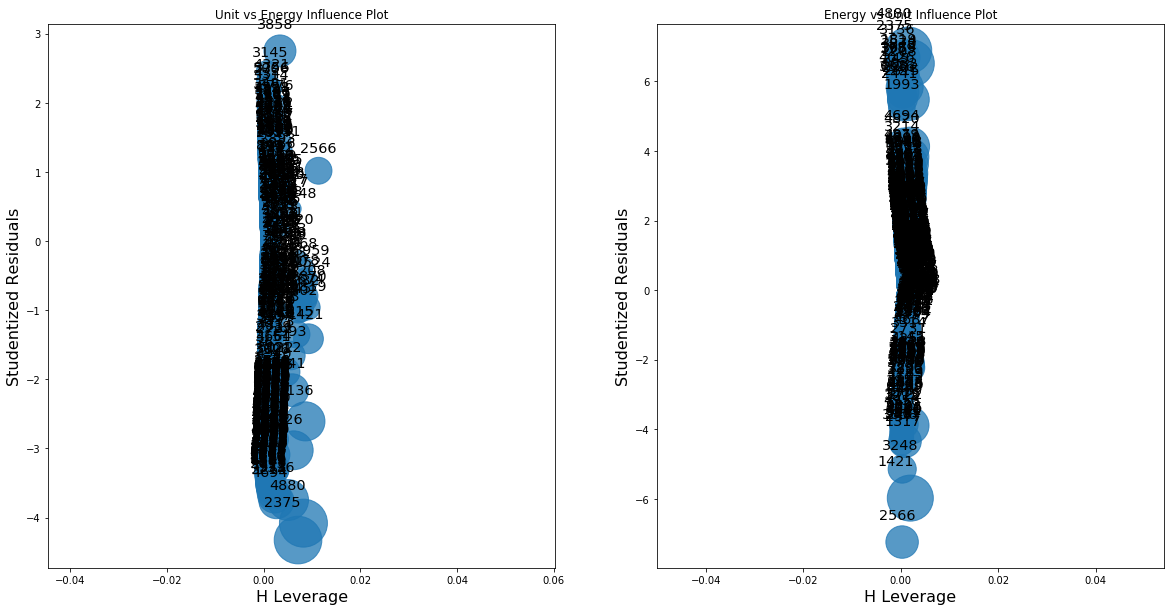

In [294]:
fig, (ax, ax2) = pl.subplots(figsize = (20, 10), ncols = 2, nrows = 1)
sm.graphics.influence_plot(unit_nrg_OLS, ax = ax, criterion="cooks")
ax.set_title('Unit vs Energy Influence Plot')

sm.graphics.influence_plot(nrg_unit_OLS, ax = ax2, criterion="cooks")
ax2.set_title('Energy vs Unit Influence Plot')

Figure 12. Influence plots of the two models in the study. The data points in Energy vs Units Influence plot are centered on 0 H Leverage while the a number of data points for Unit vs Energy Influence plot goes beyond 0 H Leverage.

# Comparing the linear and curve fit with Likelihood Ratio LR test; we require a significance $\alpha=0.05$

** The curve fit and linear fit od the Energy vs Units can be compared with LR test because they are nested models**

** The difference in the number of degrees of freedom is 1, so the LR statistics will follow a $\chi^2$ distribution with 1 DOF.**


LR = ...
**reject / not reject...**

In [282]:
nrg_unit_OLS_poly.compare_lr_test(nrg_unit_OLS)

(768.3764592680991, 4.0528591466515869e-169, 1.0)

With P-value smaller than 0.05, we can reject the null, where extra parameter is justified.